In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [22]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

# 1. How many pokemon are from the 5th generation?
a. 178
b. 165
c. 150
d. 170
Answer - 165

In [23]:
df[df['Generation'] == 5].shape

(165, 13)

# 2. How many pokemon have the highest defense score?
a. 10
b. 7
c. 3
d. 2
Answer - 3

In [24]:
df[df['Defense'] == df['Defense'].max()].shape

(3, 13)

# 3. How you will be handling missing values in this dataset:
a. Fill up the null values with the median.
b. Fill up the null values with standard deviation.
c. Fill up the null values with the mean.
d. Fill up the null values with None.

In [25]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [26]:
df['Type 2'].fillna(df['Type 1'],inplace = True)

In [27]:
df.shape

(800, 13)

In [28]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# 4. Which columns are not having any kind of relationship with the generation
column?
a. Attack
b. Speed
c. Both of the above
d. None of the above
Answer - c


In [32]:
df.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


<AxesSubplot:>

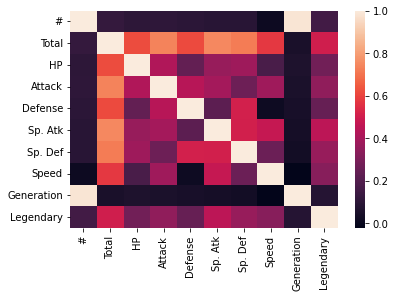

In [33]:
sns.heatmap(df.corr())

In [34]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [35]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [36]:
df['Legendary'] = df['Legendary'].map({False : 0, True : 1})

<AxesSubplot:>

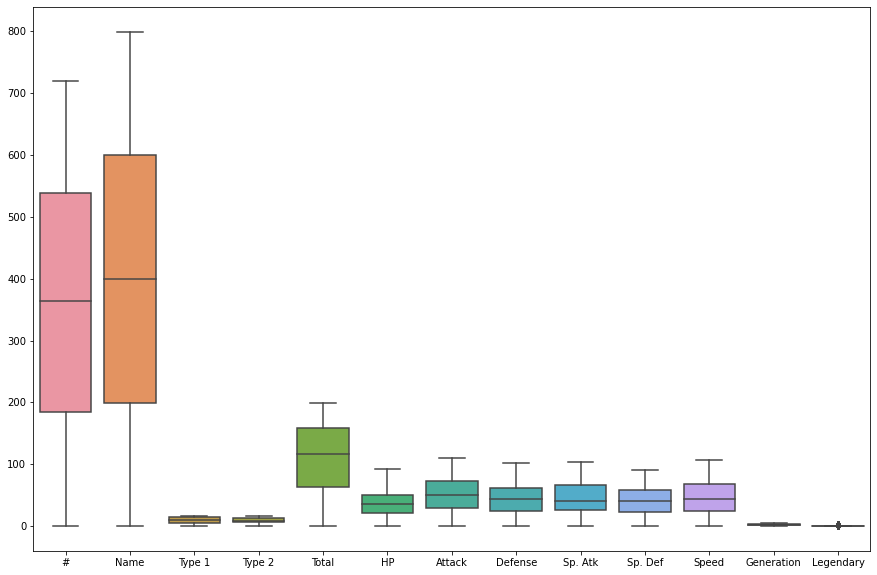

In [57]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df)

In [51]:
#df=df.fillna(method='pad',axis=1)

# assigning labels to the data
labelEncoder =LabelEncoder()
for col in df.columns:
    df[col] = labelEncoder.fit_transform(df[col])

In [52]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [40]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,80,9,13,57,17,24,23,41,37,24,0,0
1,1,329,9,13,94,31,37,37,55,50,38,0,0
2,2,745,9,13,165,51,57,55,71,66,58,0,0
3,2,746,9,13,188,51,73,86,86,77,58,0,0
4,3,102,6,6,51,11,27,18,36,22,43,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   #           800 non-null    int64
 1   Name        800 non-null    int64
 2   Type 1      800 non-null    int64
 3   Type 2      800 non-null    int64
 4   Total       800 non-null    int64
 5   HP          800 non-null    int64
 6   Attack      800 non-null    int64
 7   Defense     800 non-null    int64
 8   Sp. Atk     800 non-null    int64
 9   Sp. Def     800 non-null    int64
 10  Speed       800 non-null    int64
 11  Generation  800 non-null    int64
 12  Legendary   800 non-null    int64
dtypes: int64(13)
memory usage: 81.4 KB


5. Which of the following model is the best fit for predicting the legendary of the
pokemon based on the below parameters:
1. Handle the missing values.
2. Split the dataset into a 70:30 ratio with random_state as 1.
a. Linear Regression
b. Logistic Regression
c. Decision Tree Model
d. Random Forest Model


In [58]:
X = df.iloc[:, :-1]
y = df['Legendary']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1, train_size=0.7)

In [62]:
x_train

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
88,80,412,3,16,61,3,12,44,67,27,24,0
107,98,348,17,17,135,26,93,79,27,22,53,0
17,13,340,0,13,6,17,7,24,5,2,15,0
700,638,702,15,5,181,61,92,62,47,59,83,4
172,157,716,17,17,54,21,40,38,21,20,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...
715,647,437,12,14,184,66,52,50,88,81,68,4
767,696,730,15,2,163,53,87,82,44,31,49,5
72,65,406,5,5,47,41,55,24,12,8,15,0
235,216,736,12,12,152,60,93,48,50,45,33,1


In [61]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_test_pred = clf.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test_pred,y_test)

0.9625

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       220
           1       0.76      0.80      0.78        20

    accuracy                           0.96       240
   macro avg       0.87      0.89      0.88       240
weighted avg       0.96      0.96      0.96       240

